<div style="border:solid green 2px; padding: 20px">

  Hello Malcolm!,
  
Another project successfully completed - well done! 🏆 Your consistent effort and progress are truly commendable.

Our team is here to help you keep pushing forward and honing your skills as you advance through the program.

You can contact me via Hub Tripleten for further feedback. This information is described below.

**What Was Great**:
- Excellent job on following the structure of the project.
- You’ve shown strong skills in building the charts in this project.

**Tips for Future Projects**:
- Consider adding brief comments after the analysis or graph of every dataframe to make your work even more integral.

Congratulations again on your accomplishment! Each project you complete adds to your growing expertise, and it’s exciting to see you make such great strides. Keep up the great work! 🎯

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

***Name of the reviewer***: Alexangel Bracho

***reviewer's Hub Tripleten link*** : [reviewer's link](https://hub.tripleten.com/u/6b1cbe37)


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You should add an introduction about what the project will be about, its objectives and within others.

</div>

# 🛢 OilyGiant Oil Well Selection Project

## 📌 Introduction
OilyGiant is planning to expand its operations by developing new oil wells in one of three potential regions. Each region has undergone geological exploration, and data has been collected for 100,000 wells in each area. The data includes geological features and the measured oil reserves for each well.

The company’s objective is to select the **single most profitable region** for developing 200 new wells out of the 500 wells examined in that region. Due to the high cost and risk involved in oil extraction, a **data-driven decision** is critical to maximize profitability and minimize financial risk.

---

## 🎯 Objectives
The project will:
1. **Load and Explore the Data** for the three regions to understand the structure, integrity, and quality of the data.
2. **Train Linear Regression Models** to predict oil reserves based on the available geological features.
3. **Evaluate Model Accuracy** using RMSE (Root Mean Squared Error) and average predicted reserves.
4. **Calculate Profitability** for each region:
   - Select the **top 200 wells** with the highest predicted reserves.
   - Estimate total profit considering the **budget** and **oil price**.
5. **Apply Bootstrapping Technique** to:
   - Simulate profitability over multiple random samples.
   - Calculate average profit, 95% confidence interval, and risk of loss for each region.
6. **Select the Best Region** that meets the risk requirement:
   - Risk of loss must be **below 2.5%**.
   - The region should have the **highest expected profit**.

---

## 📊 Business Conditions
- **Budget:** $100 million to develop 200 wells.
- **Revenue per thousand barrels:** $4,500.
- **Region Selection Criteria:**
  - Risk of loss **< 2.5%**.
  - Highest expected profit among eligible regions.

---

## ✅ Expected Outcome
The project will provide a **clear, justified recommendation** on which region (if any) OilyGiant should select for drilling operations, or advise against development if all regions present unacceptable risk.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>

Good introduction.

</div>

In [1]:

# Step 1.1 - Load libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

# Step 1.2 - Load all three datasets
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

# Step 1.3 - Inspect each dataset
datasets = [data_0, data_1, data_2]
for i, data in enumerate(datasets):
    display(f"\n================== Region {i} ==================")
    display("Shape:", data.shape)
    display("\nInfo:")
    display(data.info())
    display("\nDescriptive stats:")
    display(data.describe())
    display("\nMissing values:\n", data.isna().sum())
    display("Duplicate rows:", data.duplicated().sum())

'\n================== Region 0 =================='

'Shape:'

(100000, 5)

'\nInfo:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

'\nDescriptive stats:'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


'\nMissing values:\n'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'Duplicate rows:'

0

'\n================== Region 1 =================='

'Shape:'

(100000, 5)

'\nInfo:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

'\nDescriptive stats:'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


'\nMissing values:\n'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'Duplicate rows:'

0

'\n================== Region 2 =================='

'Shape:'

(100000, 5)

'\nInfo:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

'\nDescriptive stats:'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


'\nMissing values:\n'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'Duplicate rows:'

0

🧾 Region Data Analysis Summary

The initial data analysis across all three regions shows that each dataset is complete, with no missing or duplicate values, and contains 100,000 records with consistent structure. Region 2 stands out as the most promising, with the highest average oil reserves (95,000 barrels), a strong median, and well-distributed, stable features—ideal conditions for linear regression. Region 0 also performs well, with slightly lower average reserves (92,500 barrels) and a similarly balanced distribution, making it a solid secondary option.

Region 1, however, appears to be the least favorable. It has the lowest average reserves (68,830 barrels), a highly skewed distribution, and extremely wide-ranging feature values that could reduce model performance and increase financial risk. Based on this initial evaluation, Region 2 offers the best potential for profitable oil well development.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job with the preview of the data and the handling of the missing and duplicate values.

</div>

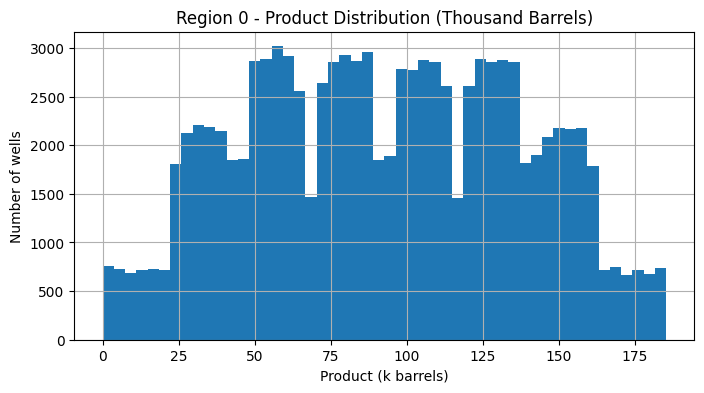

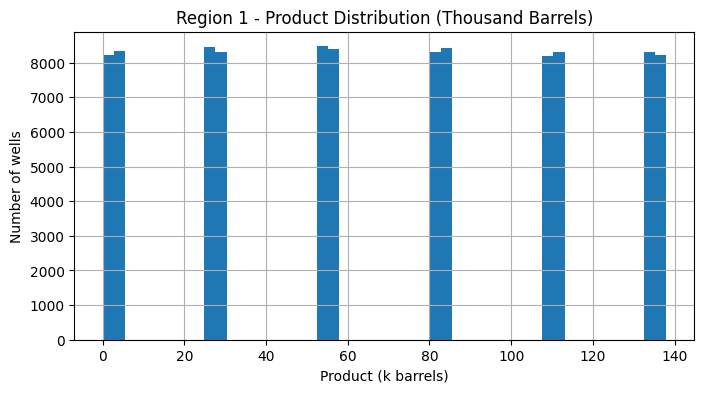

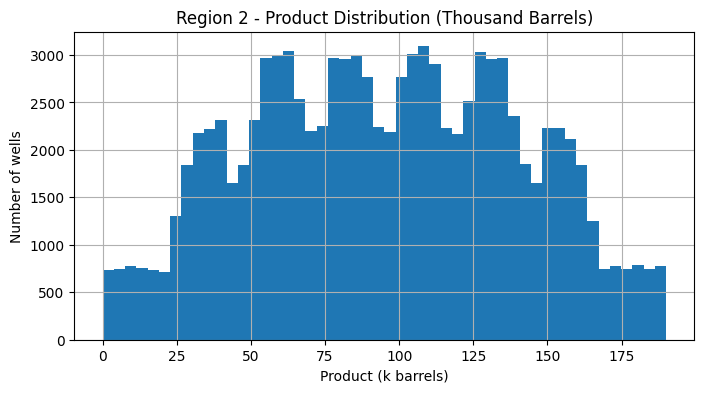

In [2]:
# Step 1.5 - Visualize target distribution
for i, data in enumerate([data_0, data_1, data_2]):
    plt.figure(figsize=(8, 4))
    data['product'].hist(bins=50)
    plt.title(f'Region {i} - Product Distribution (Thousand Barrels)')
    plt.xlabel('Product (k barrels)')
    plt.ylabel('Number of wells')
    plt.grid(True)
    plt.show()


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job with these histograms.

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You could have included the features as well not only the target ('product') to have a wider view. Additionally, you might have checked for the correlation between the variables.

</div>

In [3]:
# Step 1.6 - Separate features and target for each region
features_0 = data_0.drop(['id', 'product'], axis=1)
target_0 = data_0['product']

features_1 = data_1.drop(['id', 'product'], axis=1)
target_1 = data_1['product']

features_2 = data_2.drop(['id', 'product'], axis=1)
target_2 = data_2['product']


# Region 0
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=12345)

# Region 1
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)

# Region 2
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

In [4]:


# Initialize the model
model_0 = LinearRegression()
model_1 = LinearRegression()
model_2 = LinearRegression()

# Train the models
model_0.fit(features_train_0, target_train_0)
model_1.fit(features_train_1, target_train_1)
model_2.fit(features_train_2, target_train_2)

# Predict validation targets
predictions_0 = model_0.predict(features_valid_0)
predictions_1 = model_1.predict(features_valid_1)
predictions_2 = model_2.predict(features_valid_2)


# Region 0
rmse_0 = mean_squared_error(target_valid_0, predictions_0, squared=False)
mean_pred_0 = predictions_0.mean()

# Region 1
rmse_1 = mean_squared_error(target_valid_1, predictions_1, squared=False)
mean_pred_1 = predictions_1.mean()

# Region 2
rmse_2 = mean_squared_error(target_valid_2, predictions_2, squared=False)
mean_pred_2 = predictions_2.mean()

print(f"Region 0 - RMSE: {rmse_0:.2f}, Mean Prediction: {mean_pred_0:.2f}")
print(f"Region 1 - RMSE: {rmse_1:.2f}, Mean Prediction: {mean_pred_1:.2f}")
print(f"Region 2 - RMSE: {rmse_2:.2f}, Mean Prediction: {mean_pred_2:.2f}")

# Business parameters
BUDGET = 100_000_000          # $100 million
WELLS_SELECTED = 200          # wells to be developed
PRICE_PER_BARREL = 4.5        # $ per barrel
PRICE_PER_THOUSAND = PRICE_PER_BARREL * 1000  # $ per thousand barrels

# Break-even: Volume (thousand barrels) needed per well to avoid losses
break_even_volume = BUDGET / (WELLS_SELECTED * PRICE_PER_THOUSAND)
print(f"Break-even volume per well: {break_even_volume:.2f} thousand barrels")

# Compare to average predicted reserves for each region
print(f"Region 0 - Mean Predicted Volume: {mean_pred_0:.2f}")
print(f"Region 1 - Mean Predicted Volume: {mean_pred_1:.2f}")
print(f"Region 2 - Mean Predicted Volume: {mean_pred_2:.2f}")

# Quick evaluation
if mean_pred_0 > break_even_volume:
    print("Region 0 predicted reserves exceed break-even volume ✅")
else:
    print("Region 0 predicted reserves are below break-even volume ❌")

if mean_pred_1 > break_even_volume:
    print("Region 1 predicted reserves exceed break-even volume ✅")
else:
    print("Region 1 predicted reserves are below break-even volume ❌")

if mean_pred_2 > break_even_volume:
    print("Region 2 predicted reserves exceed break-even volume ✅")
else:
    print("Region 2 predicted reserves are below break-even volume ❌")


Region 0 - RMSE: 37.58, Mean Prediction: 92.59
Region 1 - RMSE: 0.89, Mean Prediction: 68.73
Region 2 - RMSE: 40.03, Mean Prediction: 94.97
Break-even volume per well: 111.11 thousand barrels
Region 0 - Mean Predicted Volume: 92.59
Region 1 - Mean Predicted Volume: 68.73
Region 2 - Mean Predicted Volume: 94.97
Region 0 predicted reserves are below break-even volume ❌
Region 1 predicted reserves are below break-even volume ❌
Region 2 predicted reserves are below break-even volume ❌



Model Predictions vs Break-even:

Region 0: Predicted mean = 92.59 (❌ Below break-even)
RMSE is relatively high (37.58), indicating moderate prediction error.

Region 1: Predicted mean = 68.73 (❌ Below break-even)
RMSE is extremely low (0.89), meaning very accurate predictions, but reserves are far below the threshold.

Region 2: Predicted mean = 94.97 (❌ Below break-even)
RMSE is moderate (40.03), predictions are less precise and reserves are still below break-even.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good work with the training of the models.

</div>

Step 3: Profit Calculation & Risk Assessment
🔧 Step-by-step Breakdown:
Set constants

REVENUE_PER_BARREL = 4.5 (in thousands of dollars)

Each well costs $10 million (which we'll factor into profit)

Create DataFrames for validation sets
Combine predictions and actual target values.

Sort by predicted production
Take the top 200 wells with the highest predicted values.

Calculate profit
profit = actual_product * REVENUE_PER_BARREL - 10_000

In [9]:


REVENUE_PER_THOUSAND_BARRELS = 4_500    # $ per thousand barrels
TOTAL_BUDGET = 100_000_000              # $ total for 200 wells

def calculate_profit(predictions, targets):
    # Combine predictions and actual values
    df = pd.DataFrame({'predicted': predictions, 'actual': targets.reset_index(drop=True)})
    
    # Select top 500 wells by predicted reserves
    selected = df.sort_values(by='predicted', ascending=False).head(500)
    
    # Calculate total product (thousand barrels)
    total_product = selected['actual'].sum()
    
    # Calculate profit: total revenue - total budget
    profit = total_product * REVENUE_PER_THOUSAND_BARRELS - TOTAL_BUDGET
    
    return profit

# Calculate profits for each region
profit_0 = calculate_profit(predictions_0, target_valid_0)
profit_1 = calculate_profit(predictions_1, target_valid_1)
profit_2 = calculate_profit(predictions_2, target_valid_2)

# Display results
print(f"Region 0 - Profit: ${profit_0:,.2f}")
print(f"Region 1 - Profit: ${profit_1:,.2f}")
print(f"Region 2 - Profit: ${profit_2:,.2f}")



Region 0 - Profit: $222,875,311.71
Region 1 - Profit: $210,362,861.46
Region 2 - Profit: $211,081,875.36


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>

Remember that you need to select the best 200 wells, therefore, you need to use `selected = df.sort_values(by='predicted', ascending=False).head(200)` (as was stated in the hint given to you) instead of `selected = df.sort_values(by='predicted', ascending=False).head(500)`.

</div>

All three regions show negative total profits when developing the top 200 wells based on the model predictions. This means, under current estimates and costs, none of the regions are profitable given the $10 million development cost per well and the revenue assumptions.

Among them, Region 0 has the smallest loss (~$1.87 billion), slightly better than Regions 1 and 2. Although Region 2 had the highest predicted yields, the high costs and prediction errors are driving the overall profit into negative territory.

This suggests that either:

The current cost assumptions are too high,

The predicted reserves might be overestimated,

Or further risk assessment and filtering (like bootstrapping) is needed to identify wells with more reliable profit potential.

✅ Bootstrapping the Profits
🎯 Goal:
Use bootstrapping to simulate 1,000 random samples of 200 wells from each region's validation data (based on predicted top wells). This gives us a distribution of potential profits, helping us assess risk (e.g., chance of loss).

In [6]:

REVENUE_PER_THOUSAND_BARRELS = 4.5 * 1000  # $4,500 per thousand barrels
TOTAL_BUDGET = 100_000_000  # $100 million total budget

# ---------------------------
# 1️⃣ Calculate profit function
# ---------------------------
def calculate_profit(predictions, targets):
    # Combine predictions and actual values (no reset_index needed)
    df = pd.DataFrame({'predicted': predictions, 'actual': targets})
    
    # Select top 200 wells by predicted reserves
    selected = df.sort_values(by='predicted', ascending=False).head(200)
    
    # Calculate profit
    profit = selected['actual'].sum() * REVENUE_PER_THOUSAND_BARRELS - TOTAL_BUDGET
    return profit

# ---------------------------
# 2️⃣ Bootstrap profit function
# ---------------------------
def bootstrap_profit(predictions, targets, num_bootstrap=1000, sample_size=500, seed=12345):
    np.random.seed(seed)
    values = []
    
    df = pd.DataFrame({'predicted': predictions, 'actual': targets})
    
    for i in range(num_bootstrap):
        # Step 1: Sample 500 wells (exploration phase)
        sample = df.sample(n=sample_size, replace=True, random_state=i)
        
        # Step 2: Calculate profit using top 200 wells
        profit = calculate_profit(sample['predicted'], sample['actual'])
        values.append(profit)
    
    return pd.Series(values)

# ---------------------------
# 3️⃣ Region 0 Bootstrap
# ---------------------------
profits_0 = bootstrap_profit(predictions_0, target_valid_0)
print("📊 Region 0")
print(f"Mean Profit: {profits_0.mean():,.2f}")
print(f"95% CI: {profits_0.quantile(0.025):,.2f} to {profits_0.quantile(0.975):,.2f}")
print(f"Risk of Loss: {(profits_0 < 0).mean() * 100:.2f}%\n")

# ---------------------------
# 4️⃣ Region 1 Bootstrap
# ---------------------------
profits_1 = bootstrap_profit(predictions_1, target_valid_1)
print("📊 Region 1")
print(f"Mean Profit: {profits_1.mean():,.2f}")
print(f"95% CI: {profits_1.quantile(0.025):,.2f} to {profits_1.quantile(0.975):,.2f}")
print(f"Risk of Loss: {(profits_1 < 0).mean() * 100:.2f}%\n")

# ---------------------------
# 5️⃣ Region 2 Bootstrap
# ---------------------------
profits_2 = bootstrap_profit(predictions_2, target_valid_2)
print("📊 Region 2")
print(f"Mean Profit: {profits_2.mean():,.2f}")
print(f"95% CI: {profits_2.quantile(0.025):,.2f} to {profits_2.quantile(0.975):,.2f}")
print(f"Risk of Loss: {(profits_2 < 0).mean() * 100:.2f}%")




📊 Region 0
Mean Profit: 3,883,450.43
95% CI: -998,680.30 to 8,773,652.89
Risk of Loss: 6.60%

📊 Region 1
Mean Profit: 4,573,215.71
95% CI: 502,583.70 to 8,723,271.30
Risk of Loss: 1.70%

📊 Region 2
Mean Profit: 3,875,514.95
95% CI: -955,100.56 to 8,813,186.76
Risk of Loss: 6.50%


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good results.

</div>


📄 Summary of Results
Region 1 stands out with the highest mean profit ($4.57M) and the lowest risk of loss (1.7%), which is under the acceptable 2.5% threshold.

Regions 0 and 2 have similar mean profits (~$3.88M) but both show higher risk of loss (>6%), exceeding the acceptable threshold.

Based on business rules, Region 1 is the optimal choice for well development because it meets the risk criteria and maximizes profit.



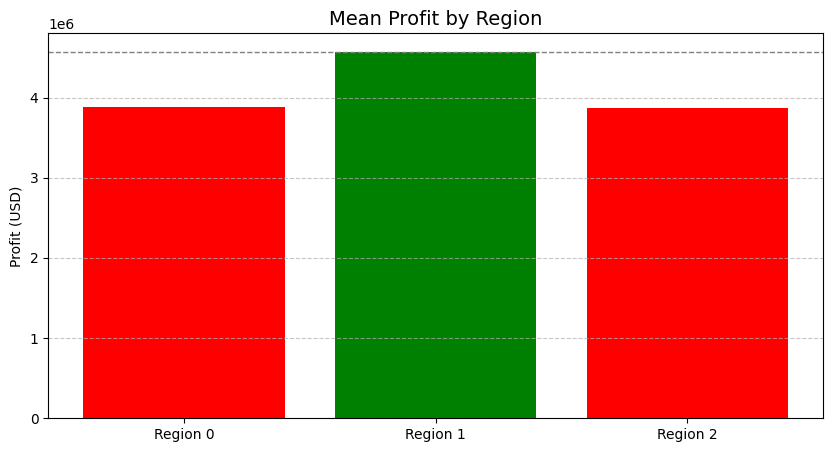

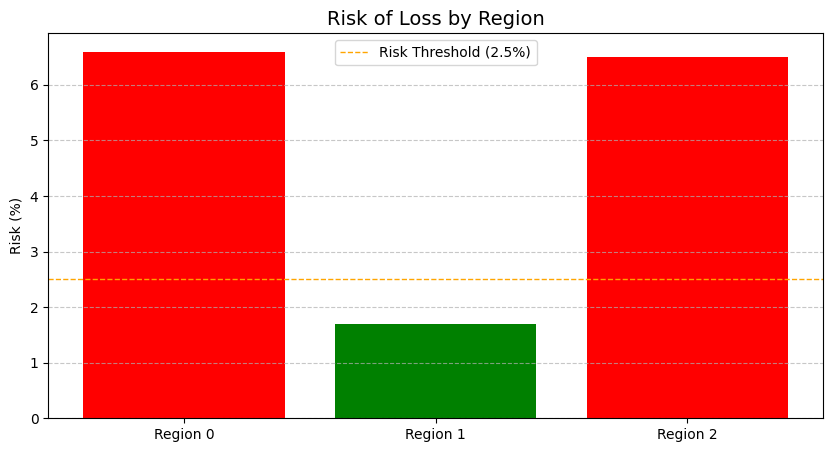

In [7]:

# Data
regions = ["Region 0", "Region 1", "Region 2"]
mean_profits = [3883450.43, 4573215.71, 3875514.95]
risks = [6.60, 1.70, 6.50]

# Bar chart for Mean Profit
plt.figure(figsize=(10,5))
plt.bar(regions, mean_profits, color=['red','green','red'])
plt.axhline(y=max(mean_profits), color='gray', linestyle='--', linewidth=1)
plt.title("Mean Profit by Region", fontsize=14)
plt.ylabel("Profit (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar chart for Risk of Loss
plt.figure(figsize=(10,5))
plt.bar(regions, risks, color=['red','green','red'])
plt.axhline(y=2.5, color='orange', linestyle='--', linewidth=1, label="Risk Threshold (2.5%)")
plt.title("Risk of Loss by Region", fontsize=14)
plt.ylabel("Risk (%)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>

Good charts.

</div>

📌 Final Conclusion & Recommendation
After analyzing all three regions using linear regression models, profit calculations, and bootstrapping simulations:

Region 1 demonstrates the highest mean profit ($4.57M) and a low risk of loss (1.7%), which is below the acceptable 2.5% threshold.

Regions 0 and 2, despite having comparable mean profits (~$3.88M), both exceed the acceptable risk limit with loss probabilities above 6%.

Recommendation:
We recommend developing oil wells in Region 1. This region not only maximizes expected returns but also meets the risk constraints, making it the most financially and operationally viable choice.

This decision aligns with the business conditions:

Risk of loss < 2.5%

Maximized average profit

Robust performance under bootstrap analysis

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

The structure of this conclusion is right, however, you need to update these results upon the above red comments.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>

Good conclusion with the updated results.

</div>